In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

parquet_directory = 'data_selfimprovement/data_with_attributes.parquet/'
parquet_files = [os.path.join(parquet_directory, f) for f in os.listdir(parquet_directory) if f.endswith('.parquet')]
dfs_attributes = [pd.read_parquet(file) for file in parquet_files]
df_attributes = pd.concat(dfs_attributes, ignore_index=True)
df_attributes['moral'] = df_attributes['moral'].astype(float)

df_attributes

,id,cleaned_text,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,moral,relevant_topics,relevant_liwc_scores,relevant_attr
0,100phe5,personally i find that kind of stuff so addict...,0.248734,0.002506,0.002550,0.003143,0.004230,0.003298,0.729032,0.003230,0.003277,3.53,0.0,0.0,0.0,0.0,0.00,"[0, 6]",[11],"[0, 6, 11]"
1,100pop2,last new year i made a new years resolution to...,0.116893,0.065164,0.069872,0.000419,0.217232,0.083271,0.288837,0.057190,0.101123,1.06,0.71,0.18,0.18,0.0,0.53,"[4, 6]",[13],"[4, 6, 13]"
2,100tt3v,whats the difference between a good new years ...,0.089803,0.000645,0.000657,0.366495,0.317181,0.000849,0.148691,0.000832,0.074847,0.72,1.44,0.0,0.0,0.36,0.00,"[3, 4]",[12],"[3, 4, 12]"
3,100upcd,i always worry about how my voice sounds to ot...,0.582016,0.004301,0.174586,0.005394,0.007264,0.209211,0.006061,0.005542,0.005624,0.0,5.56,3.7,0.0,0.0,0.00,"[0, 5]",[12],"[0, 5, 12]"
4,101euz5,weve been using rewards all wrong how do you ...,0.000224,0.031925,0.080934,0.201670,0.000293,0.169493,0.515011,0.000224,0.000227,0.82,0.58,0.12,0.0,0.06,0.18,"[3, 6]",[],"[3, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507600,zzrfyi,1 i have came out my shell i have suffered wi...,0.001674,0.001300,0.265627,0.001630,0.068845,0.001710,0.157562,0.120455,0.381199,2.0,3.33,1.33,0.0,1.33,0.00,"[2, 8]","[11, 12]","[2, 8, 11, 12]"
507601,zzrqgw,i bought 3 books and havent finished one of th...,0.001551,0.094803,0.001225,0.001510,0.002036,0.001584,0.555263,0.123237,0.218791,1.81,1.2,0.6,0.0,0.0,0.00,"[6, 8]","[11, 12]","[6, 8, 11, 12]"
507602,zzx58w,i am 26 years old for me mental peacestability...,0.209526,0.014702,0.048663,0.109917,0.000695,0.052650,0.000580,0.239667,0.323601,0.14,1.37,0.41,0.41,0.27,0.27,"[0, 7, 8]",[12],"[0, 7, 8, 12]"
507603,zzxdu8,i have made a lot of progress this past year a...,0.398510,0.000936,0.000952,0.040661,0.208732,0.001231,0.001319,0.001206,0.346452,1.42,1.78,0.71,0.0,1.07,0.00,"[0, 4, 8]","[11, 12]","[0, 4, 8, 11, 12]"


## Topics accross morality scores

Create the same bins as in the 01-morality-assessment notebook

In [11]:
#Create bins of documents with different levels of morality language

#No moral language
bin_0 = df_attributes[df_attributes.moral == 0.00] 

#Moral language but below the LIWC's blogs' average
bin_1 = df_attributes[(df_attributes.moral > 0.00) & (df_attributes.moral < 0.28)]

#Moral language but above the LIWC's blogs' average
bin_2 = df_attributes[(df_attributes.moral >= 0.28) & (df_attributes.moral < 3.23)]

#Outliers of moral language
bin_3 = df_attributes[(df_attributes.moral >= 3.23)]

Create function to define how represented is each topic on a given bin

In [28]:
def calculate_topics_percentage(df, label):
    topic_columns = ['topic{}'.format(n) for n in range(0,9)] 
    # Calculate the sum of proportions for each topic
    topic_sums = df[topic_columns].sum()
    total_sum = topic_sums.sum()
    topic_percentage = (topic_sums / total_sum) * 100
    # Convert to DataFrame
    topic_percentage_df = pd.DataFrame({
        'topic': topic_percentage.index,
        '{}'.format(label): topic_percentage.values
    })
    
    return topic_percentage_df


See topic distribution in general

In [81]:
calculate_topics_percentage(df_attributes, "All documents")

,topic,All documents
0,topic0,11.941850
1,topic1,6.814383
2,topic2,8.088836
3,topic3,10.449410
4,topic4,15.415545
5,topic5,11.293739
6,topic6,14.037983
7,topic7,10.887751
8,topic8,11.070503


In [29]:
topics_bin0 = calculate_topics_percentage(bin_0, "No_moral_language")
topics_bin1 = calculate_topics_percentage(bin_1, "Below_LIWC_average_moral_language")
topics_bin2 = calculate_topics_percentage(bin_2, "Above_LIWC_average_moral_language")
topics_bin3 = calculate_topics_percentage(bin_3, "Outliers")

#Print example
topics_bin3

,topic,Outliers
0,topic0,17.351596
1,topic1,6.063425
2,topic2,9.201481
3,topic3,6.906610
4,topic4,17.703274
5,topic5,22.574650
6,topic6,5.189951
7,topic7,9.025357
8,topic8,5.983656


In [78]:
#Combine results of topics representation in each bin
result1 = pd.merge(topics_bin0, topics_bin1, on='topic', how='inner')
result2 = pd.merge(result1, topics_bin2, on='topic', how='inner')
final_df = pd.merge(result2, topics_bin3, on='topic', how='inner')
final_df["topic"] = [
    "Family and mental health",
    "Media and learning",
    "Sexual-affective relationships and social media",
    "Hobbies and interests",
    "Mindset and beliefs",
    "Choices and struggles",
    "Health and fitness",
    "Confidence and socializing",
    "Career and education"]

final_df


,topic,No_moral_language,Below_LIWC_average_moral_language,Above_LIWC_average_moral_language,Outliers
0,Family and mental health,11.073062,11.227313,14.082980,17.351596
1,Media and learning,6.971984,6.242764,6.470745,6.063425
2,Sexual-affective relationships and social media,7.956947,6.791811,8.493539,9.201481
3,Hobbies and interests,11.088355,9.693604,8.955967,6.906610
4,Mindset and beliefs,14.969661,16.873723,16.393686,17.703274
5,Choices and struggles,9.893709,10.418934,14.625099,22.574650
6,Health and fitness,15.905247,13.378099,9.497708,5.189951
7,Confidence and socializing,10.833568,10.109382,11.161344,9.025357
8,Career and education,11.307467,15.264370,10.318931,5.983656


Visualization - First approach

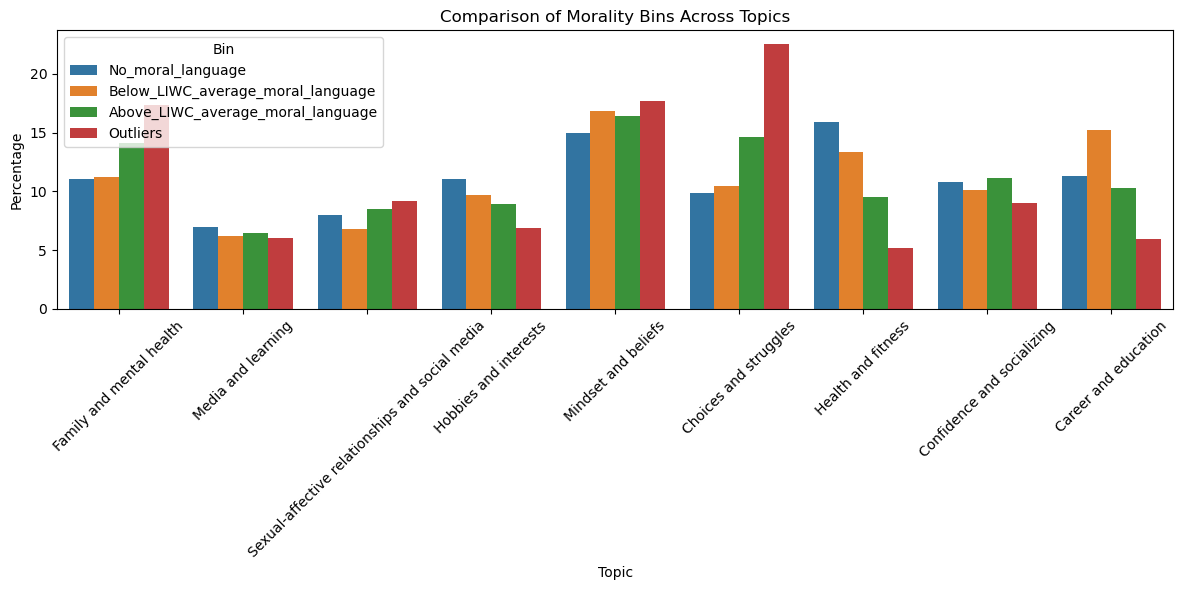

In [79]:
# Reshape the DataFrame to long format
df_melted = pd.melt(final_df, id_vars=['topic'], var_name='bin', value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='value', hue='bin', data=df_melted)

plt.title('Comparison of Morality Bins Across Topics')
plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate topic names for better readability
plt.legend(title='Bin', loc='upper left')

plt.tight_layout()
plt.show()

Visualization - Second approach

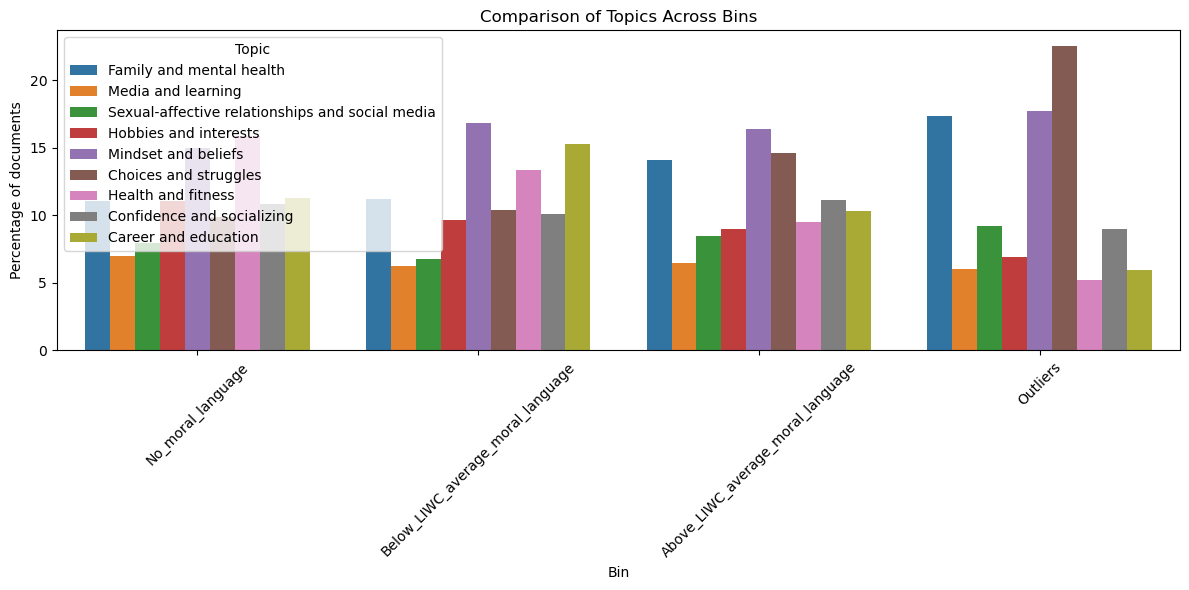

In [80]:
# Create a bar plot with bins on the x-axis and topics as the hue
plt.figure(figsize=(12, 6))
sns.barplot(x='bin', y='value', hue='topic', data=df_melted)

# Add labels and title
plt.title('Comparison of Topics Across Bins')
plt.xlabel('Bin')
plt.ylabel('Percentage of documents')
plt.xticks(rotation=45)  # Rotate bin labels for better readability
plt.legend(title='Topic', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

Visualization - 3rd approach

In [44]:
df = df_attributes
topic0 = df_attributes[df['relevant_topics'].apply(lambda x: 0 in x)]
topic1 = df_attributes[df['relevant_topics'].apply(lambda x: 1 in x)]
topic2 = df_attributes[df['relevant_topics'].apply(lambda x: 2 in x)]
topic3 = df_attributes[df['relevant_topics'].apply(lambda x: 3 in x)]
topic4 = df_attributes[df['relevant_topics'].apply(lambda x: 4 in x)]
topic5 = df_attributes[df['relevant_topics'].apply(lambda x: 5 in x)]
topic6 = df_attributes[df['relevant_topics'].apply(lambda x: 6 in x)]
topic7 = df_attributes[df['relevant_topics'].apply(lambda x: 7 in x)]
topic8 = df_attributes[df['relevant_topics'].apply(lambda x: 8 in x)]


In [66]:
def get_morality_bins_proportions(df, label):
    # Get total number of documents with topics
    total_n = df.shape[0]

    # No moral language
    bin_0 = df[df.moral == 0.00]
    # Moral language but below the LIWC's blogs' average
    bin_1 = df[(df.moral > 0.00) & (df.moral < 0.28)]
    # Moral language but above the LIWC's blogs' average
    bin_2 = df[(df.moral >= 0.28) & (df.moral < 3.23)]
    # Outliers of moral language
    bin_3 = df[(df.moral >= 3.23)]

    # Create dictionary with proportions
    proportions_dict = {
        "Category".format(label): [
            "No moral language",
            "Below LIWC average",
            "Above LIWC average",
            "Outlier"
        ],
        "{}".format(label): [
            bin_0.shape[0] / total_n,
            bin_1.shape[0] / total_n,
            bin_2.shape[0] / total_n,
            bin_3.shape[0] / total_n
        ]
    }

    # Create DataFrame
    df_proportions = pd.DataFrame(proportions_dict)
    return df_proportions

In [69]:
topic0_by_bins = get_morality_bins_proportions(topic0, "Topic0")
topic1_by_bins = get_morality_bins_proportions(topic1, "Topic1")
topic2_by_bins = get_morality_bins_proportions(topic2, "Topic2")
topic3_by_bins = get_morality_bins_proportions(topic3, "Topic3")
topic4_by_bins = get_morality_bins_proportions(topic4, "Topic4")
topic5_by_bins = get_morality_bins_proportions(topic5, "Topic5")
topic6_by_bins = get_morality_bins_proportions(topic6, "Topic6")
topic7_by_bins = get_morality_bins_proportions(topic7, "Topic7")
topic8_by_bins = get_morality_bins_proportions(topic8, "Topic8")


In [72]:
merge_1 = topic0_by_bins.merge(topic1_by_bins, how='inner')
merge_2 = merge_1.merge(topic2_by_bins, how='inner')
merge_3 = merge_2.merge(topic3_by_bins, how='inner')
merge_4 = merge_3.merge(topic4_by_bins, how='inner')
merge_5 = merge_4.merge(topic5_by_bins, how='inner')
merge_6 = merge_5.merge(topic6_by_bins, how='inner')
merge_7 = merge_6.merge(topic7_by_bins, how='inner')
final_df = merge_7.merge(topic8_by_bins, how='inner')

In [73]:
final_df

,Category,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
0,No moral language,0.648005,0.745052,0.698355,0.754415,0.673991,0.610217,0.790541,0.701081,0.717525
1,Below LIWC average,0.017612,0.011046,0.013341,0.015737,0.022929,0.015361,0.019854,0.016813,0.028765
2,Above LIWC average,0.319756,0.234015,0.276589,0.223370,0.291828,0.354720,0.185808,0.273868,0.248387
3,Outlier,0.014626,0.009888,0.011715,0.006478,0.011252,0.019702,0.003797,0.008238,0.005323


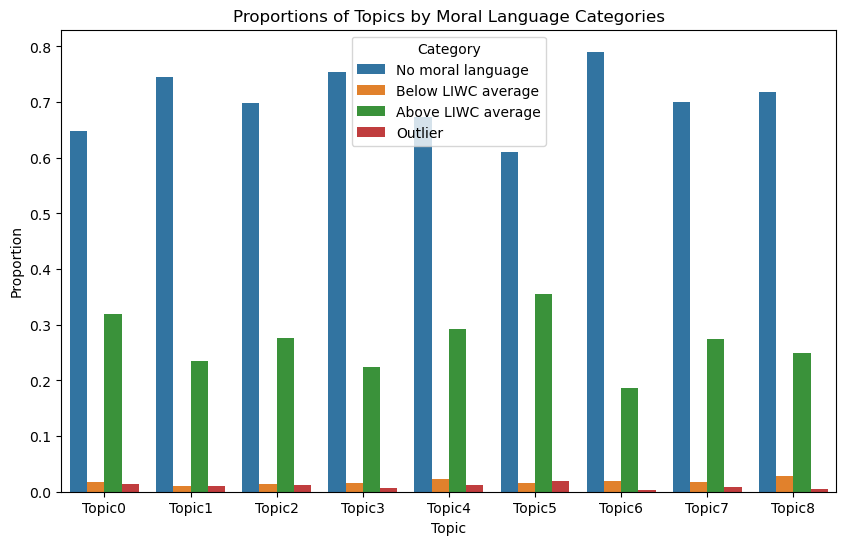

In [75]:
# Melt the DataFrame for easier plotting
df_melted = final_df.melt(id_vars="Category", var_name="Topic", value_name="Proportion")

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Topic', y='Proportion', hue='Category', data=df_melted)
plt.title('Proportions of Topics by Moral Language Categories')
plt.show()

Not a good visualization, makes sense since in the end the majority of the corpus is biased towards non moral language